# NBA Player Statistics Workshop - Solutions

Given a dataset of NBA players performance and salary in 2014, use Python to load the dataset and compute the summary statistics for the `SALARY` field:

- mean
- median
- mode
- minimum
- maximum

You will need to make use of the csv module to load the data and interact with it. Computations should require only simple arithmetic. (For the purposes of this exercise, attempt to use pure Python and no third party dependencies like Pandas - you can then compare and contrast the use of Pandas for this task later). 

**Bonus:**

Determine the relationship of PER (Player Efficiency Rating) to Salary via a visualization of the data.


NBA 2014 Players Dataset: [http://bit.ly/2n9twqX](http://bit.ly/2n9twqX)

In [1]:
# Imports

import os
import csv
import json

from collections import Counter
from operator import itemgetter
from requests import get

## Fetching the Data

You have a couple of options of fetching the data set to begin your analysis:

1. Click on the link above and Download the file. 
2. Write a Python function that automatically downloads the data as a comma-separated value file (CSV) and writes it to disk. 

In either case, you'll have to be cognizant of where the CSV file lands. Here is a quick implementation of a function to download a URL at a file and write it to disk. Note the many approaches to do this as outlined here: [How do I download a file over HTTP using Python?](http://stackoverflow.com/questions/22676/how-do-i-download-a-file-over-http-using-python). 

In [2]:
def download(url, path):
    """
    Downloads a URL and writes it to the specified path. The "path" 
    is like the mailing address for the file - it tells the function 
    where on your computer to send it!
    
    Also note the use of "with" to automatically close files - this 
    is a good standard practice to follow.
    """
    with open(path,'wb') as f:
        response = get(url)
        f.write(response.content)

**Your turn: use the above function to download the data!**

In [3]:
## Write the Python to execute the function and download the file here:
download('http://bit.ly/2n9twqX', 'nba_players.csv') # Whatever your path is

## Loading the Data

Now that we have the CSV file that we're looking for, we need to be able to open the file and read it into memory. The trick is that we want to read only a single line at a time - consider really large CSV files. Python provides memory efficient iteration in the form of `generators` and the `csv.reader` module exposes one such generator, that reads the data from the CSV one row at a time. Moreover, we also want to parse our data so that we have specific access to the fields we're looking for. The `csv.DictReader` class will give you each row as a dictionary, where the keys are derived from the first, header line of the file. 

Here is a function that reads data from disk one line at a time and `yield`s it to the user. 

In [4]:
def read_csv(path):
    # First open the file
    with open(path, 'rt') as f:
        # Create a DictReader to parse the CSV
        reader = csv.DictReader(f)
        for row in reader:
            # HINT: Convert SALARY column values into integers & PER column into floats.
            # Otherwise CSVs can turn ints into strs! You'll thank me later :D
            row['SALARY'] = int(row['SALARY'])
            row['PER'] = float(row['PER'])
            # Now yield each row one at a time.
            yield row

**Your turn: use the above function to open the file and print out the first row of the CSV!**

To do this, you'll need to do three things:

First, remember where you told the `download` function to store your file? Pass that same path into `read_csv`:

In [5]:
## Write the Python to execute our read_csv function.
x = read_csv('fixtures/nba_players.csv') # Whatever your path is

Next step: The `read_csv` function "returns" a generator. How can we access just the first row? Remember [how to access the next row of a generator](http://stackoverflow.com/questions/4741243/how-to-pick-just-one-item-from-a-generator-in-python)? 

In [6]:
## Now write the Python to print the first row of the CSV here.
print(next(x))

OrderedDict([('PLAYER', 'Kevin Durant'), ('TEAM', ' OKC'), ('POS', 'SF'), ('GP', '81'), ('MPG', '38.5'), ('TS%', '0.635'), ('AST', '16.1'), ('TO', '10.3'), ('USG', '31.2'), ('ORR', '2.2'), ('DRR', '18.6'), ('REBR', '10.8'), ('PER', 29.9), ('VA', '903.8'), ('EWA', '30.1'), ('AGE', '25'), ('HT', '81'), ('WT', '240'), ('SALARY', 18995624)])


Are there different ways to print the first _n_ rows of something? Sure! Try using break, which will stop a for loop from running. E.g. the code:

```python
for idx in xrange(100):
    if idx > 10:
        break
```

...will stop the for loop after 10 iterations.

Next, write a `for` loop that can access and print every row.

In [7]:
## Write the Python to print *every* row of the CSV here.
for player in x:
    print(next(x))

OrderedDict([('PLAYER', 'Kevin Love'), ('TEAM', ' MIN'), ('POS', 'PF'), ('GP', '77'), ('MPG', '36.3'), ('TS%', '0.591'), ('AST', '15.2'), ('TO', '8.7'), ('USG', '27.7'), ('ORR', '8.5'), ('DRR', '29.5'), ('REBR', '18.7'), ('PER', 26.97), ('VA', '645.8'), ('EWA', '21.5'), ('AGE', '25'), ('HT', '82'), ('WT', '243'), ('SALARY', 15719063)])
OrderedDict([('PLAYER', 'DeMarcus Cousins'), ('TEAM', ' SAC'), ('POS', 'C'), ('GP', '71'), ('MPG', '32.4'), ('TS%', '0.555'), ('AST', '10.8'), ('TO', '13.1'), ('USG', '30.7'), ('ORR', '10.6'), ('DRR', '30.5'), ('REBR', '20.4'), ('PER', 26.18), ('VA', '534.5'), ('EWA', '17.8'), ('AGE', '24'), ('HT', '83'), ('WT', '270'), ('SALARY', 14746000)])
OrderedDict([('PLAYER', 'Brook Lopez'), ('TEAM', ' BKN'), ('POS', 'C'), ('GP', '17'), ('MPG', '31.4'), ('TS%', '0.629'), ('AST', '4.9'), ('TO', '8.7'), ('USG', '24.1'), ('ORR', '8.8'), ('DRR', '14.1'), ('REBR', '11.5'), ('PER', 25.5), ('VA', '118.6'), ('EWA', '4'), ('AGE', '26'), ('HT', '85'), ('WT', '275'), ('SALAR

## Summary Statistics

In this section, you'll use the CSV data to write computations for mean, median, mode, minimum, and maximum. Use Python to access the values in the `SALARY` column.

In [8]:
data = list(read_csv('fixtures/nba_players.csv')) #You can put in your own path here.
data  = sorted(data, key=itemgetter('SALARY'))

total = 0
count = 0

for row in data:
        count += 1
        total += row['SALARY']

# Total Count
print("There are {0:d} total players.".format(count))

# Median
midway_point = (count)//2 # But what happens if the length of the list is even?
median = data[midway_point]['SALARY']  
print("The median salary is {0:d}.".format(median))

# Minimum
minimum = data[0]['SALARY']
print("The minimum salary is {0:d}.".format(minimum))

# Maximum
maximum = data[-1]['SALARY']
print("The maximum salary is {0:d}.".format(maximum))

# Mean
mean = total//(count)
print("The mean salary is {0:d}.".format(mean))

There are 323 total players.
The median salary is 3657500.
The minimum salary is 0.
The maximum salary is 23410988.
The mean salary is 5323345.


Nice work! Now... calculating the mode is a bit different. Remember about the [Decorate-Sort-Undecorate](http://www.greenteapress.com/thinkpython/html/thinkpython013.html) pattern that we learned about in ThinkPython? That will work here!

In [9]:
frequency = {}

for row in data:
    if row['SALARY'] not in frequency:
        frequency[row['SALARY']] = 1
    else:
        frequency[row['SALARY']] += 1

sort_freq = []
for key,val in frequency.items():
    sort_freq.append((val,key))
sort_freq.sort(reverse = True)

mode = sort_freq[0][1]
mode_count = sort_freq[0][0]
print("The mode salary is {0:d}, which appears {1:d} times.".format(mode,mode_count))

The mode salary is 0, which appears 24 times.


The "DSU" approach is a little inefficient. Instead of using a dictionary as our data type to solve the mode problem, we could use counter() from the Collections module. [Read more about counter()](https://pymotw.com/3/collections/counter.html) and try it out here:

In [10]:
count = 0
total = 0.0
freqs = Counter() # Here it is!

for row in data:
    count += 1
    total += row['SALARY']
    freqs[row['SALARY']] += 1
    
mode = freqs.most_common(2)
print(mode)

[(0, 24), (915243, 23)]


#### Putting the pieces together

The above summary statistics can actually be computed inside of a single (and elegant!) function. Give it a try!

In [11]:
def statistics(path):
    data  = list(read_csv(path))
    data  = sorted(data, key=itemgetter('SALARY'))

    count = 0
    total = 0.0
    freqs = Counter()

    for row in data:
        count += 1
        total += row['SALARY']
        freqs[row['SALARY']] += 1

    stats = {
        'maximum': data[-1]['SALARY'],
        'minimum': data[0]['SALARY'],
        'median': data[count // 2]['SALARY'], # But what happens if the length of the list is even?
        'mode': freqs.most_common(2),
        'mean': total // count,
    }
    
    return stats

In [12]:
print(statistics('./fixtures/nba_players.csv'))

{'maximum': 23410988, 'minimum': 0, 'median': 3657500, 'mode': [(0, 24), (915243, 23)], 'mean': 5323345.0}


Isn't that nice? But we could still make it better. Keep playing with the above function to get it to work more efficiently or to reduce bad data in the computation - e.g. what are all those zero salaries? 


## Visualization

Congratulations if you've made it this far! It's time for the bonus round!

You've now had some summary statistics about the salaries of NBA players, but what we're really interested in is the relationship between `SALARY` and the rest of the fields in the data set. The `PER` - Player Efficiency Rating, is an aggregate score of all performance statistics; therefore if we determine the relationship of `PER` to `SALARY`, we might learn a lot about how to model NBA salaries. 

In order to explore this, let's create a scatter plot of `SALARY` to `PER`, where each point is an NBA player.

Visualization is going to require a third party library. You probably already have matplotlib, so that might be the simplest if you're having trouble with installation. If you don't, `pip install` it now! Follow the documentation to create the scatter plot inline in the notebook in the following cells.

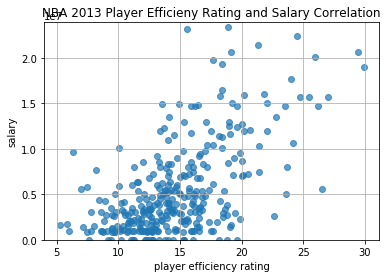

In [13]:
# Insert your Python to create the visualization here
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

def read_data(path):
    return pd.DataFrame(pd.read_csv(path))

def graph_data(path, xkey='PER', ykey='SALARY'):
    data = read_data(path)
    xval = data['PER']
    yval = data['SALARY']

    fig,axe = plt.subplots()
    plt.scatter(xval, yval, alpha=0.7)
    plt.ylim([-10000, data['SALARY'].max()+500000])

    plt.ylabel('salary')
    plt.xlabel('player efficiency rating')
    plt.title('NBA 2013 Player Efficieny Rating and Salary Correlation')

    plt.grid(True)
    plt.show()

graph_data('fixtures/nba_players.csv') # Or whatever your path is

Nice work!! Matplotlib is pretty useful, but also kind of bare bones. Once you're ready to experiment with other libraries and take your visualizations to the next level, check out the following:

- Seaborn
- Bokeh
- Pandas

Our favorite is Bokeh - it's interactive!